# Tutorial on Feature Selection/Transormation and Decision Trees

Feature Selection is the process of identifying and selecting a subset of relevant features from your dataset. This helps improve model performance by:
- Reducing complexity and overfitting.
- Focusing on informative features.
- Enhancing interpretability.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_diabetes, load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, f_classif

## Setup and Data Loading
First, let's load the necessary libraries and two datasets.

In [ ]:
# Toy dataset: Iris
iris = load_iris()
X_iris  = pd.DataFrame(iris.data, columns=iris.feature_names)
y_iris = iris.target

X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, test_size=0.3, random_state=12)

df_ = pd.DataFrame(X_iris, columns=iris.feature_names)
df_.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Main dataset: Diabetes
db = load_diabetes()
X = pd.DataFrame(db.data, columns=db.feature_names)
y = db.target


# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dataset features: {X.keys()}")
print(f"Number of features: {len(X.columns)}")
print(f"Target values: {y_train[:5]}")
X_train.head(5)

Dataset features: Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')
Number of features: 10
Target values: [144. 150. 280. 125.  59.]


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
17,0.070769,0.050680,0.012117,0.056301,0.034206,0.049416,-0.039719,0.034309,0.027364,-0.001078
66,-0.009147,0.050680,-0.018062,-0.033213,-0.020832,0.012152,-0.072854,0.071210,0.000272,0.019633
137,0.005383,-0.044642,0.049840,0.097615,-0.015328,-0.016345,-0.006584,-0.002592,0.017036,-0.013504
245,-0.027310,-0.044642,-0.035307,-0.029770,-0.056607,-0.058620,0.030232,-0.039493,-0.049872,-0.129483
31,-0.023677,-0.044642,-0.065486,-0.081413,-0.038720,-0.053610,0.059685,-0.076395,-0.037129,-0.042499


## 1. Decision Trees

Decision trees are a type of supervised learning algorithm that resembles a flowchart-like structure for classification and regression tasks. They work by recursively splitting the data based on features (attributes) to create a tree model.

In [ ]:
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
model = DecisionTreeClassifier()

# Fit the model
model.fit(X_iris_train, y_iris_train)
acc_train = model.score(X_iris_train, y_iris_train)
acc_test = model.score(X_iris_test, y_iris_test)
print("Train accuracy on Iris dataset:", acc_train)
print("Test accuracy on Iris dataset:", acc_test)


Train accuracy on Iris dataset: 1.0
Test accuracy on Iris dataset: 0.9777777777777777


In [ ]:
depth = model.tree_.max_depth
print(f"Maximum depth of the trained tree: {depth}\n")
print(tree.export_text(model))

Maximum depth of the trained tree: 6

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_2 <= 4.85
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.65
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |--- feature_2 >  4.85
|   |   |--- feature_3 <= 1.70
|   |   |   |--- feature_2 <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  4.95
|   |   |   |   |--- feature_3 <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_3 >  1.55
|   |   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |   |--- class: 2
|   |   |--- feature_3 >  1.70
|   |   |   |--- class: 2



## 2. Feature Selection using Decision Trees

Decision trees inherently provide feature importance scores, indicating which features contributed most to splitting decisions.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
model = DecisionTreeRegressor()

# Fit the model
model.fit(X_train, y_train)

acc_test = model.score(X_test, y_test)
print("Test accuracy on Diabetes dataset:", acc_test)

Test accuracy on Diabetes dataset: 0.08300860730875415


In [ ]:
# Get feature importances
importances = model.feature_importances_

importances_df = pd.DataFrame(importances, index=X_train.keys(), columns=["Importance"])
print(importances_df, end="\n\n")

     Importance
age    0.065283
sex    0.007691
bmi    0.411354
bp     0.069490
s1     0.080434
s2     0.054645
s3     0.058485
s4     0.034104
s5     0.150905
s6     0.067609



In [ ]:
print("Sorted version\n")
importances_df = importances_df.sort_values(by="Importance", ascending=False)
print(importances_df)

Sorted version

     Importance
bmi    0.411354
s5     0.150905
s1     0.080434
bp     0.069490
s6     0.067609
age    0.065283
s3     0.058485
s2     0.054645
s4     0.034104
sex    0.007691


## 3. Feature Selection using SelectKBest
#### 3.1 SelectKBest allows us to select the top k features based on a scoring function, like `chi2` for categorical data.

Common score functions used:

- Chi-Square Test (Classification):
  - Equation: $X^2 = \Sigma (0_i - E_i)^2 / E_i$
  - $O_i$: Observed frequency in category $i$
  - $E_i$: Expected frequency in category $i$ (assuming independence)
  - Intuition: Measures the difference between observed and expected frequencies in categorical features, indicating a potential association with the target class.

- Information Gain (Classification):
  - Measures the reduction in uncertainty about the target variable after considering a feature.
  - Higher information gain indicates a more informative feature.

  Check out more scoring functions here: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Apply SelectKBest with chi2
skb = SelectKBest(score_func=chi2, k=2)
X_new_iris = skb.fit_transform(X_iris_train, y_iris_train)

print("Shape of X before SelectKBest:", X_iris_train.shape)
print("Shape of X after SelectKBest:", X_new_iris.shape)

Shape of X before SelectKBest: (105, 4)
Shape of X after SelectKBest: (105, 2)


In [ ]:
# Check which features were selected

selected_features = skb.get_support()
selected_features = X_iris.keys()[selected_features]
print(f"Selected features: ", selected_features)

Selected features:  Index(['petal length (cm)', 'petal width (cm)'], dtype='object')


In [ ]:
def run_tree(x_train,y_train, x_test, y_test, task="clf"):
  model = DecisionTreeClassifier(max_depth=4, random_state=14) if task=="clf" else DecisionTreeRegressor(max_depth=10, random_state=14)
  model.fit(x_train,y_train)
  return model.score(x_test,y_test)

print("Accuracy on original Iris:", run_tree(X_iris_train, y_iris_train, X_iris_test, y_iris_test, task="clf"))
print("Accuracy on reduced Iris:", run_tree(X_new_iris, y_iris_train, X_iris_test[selected_features], y_iris_test, task="clf"))


Accuracy on original Iris: 0.9777777777777777
Accuracy on reduced Iris: 0.9555555555555556


#### 3.2 `SelectKBest` can also be used in regression scenarios, but we choose a scoring *function* suitable for regression, like `f_regression.`

- F-Test (Regression):
  - Compares the variance between groups (explained by the feature) to the variance within groups (unexplained variance).
  - Higher F-statistic suggests the feature is more relevant for explaining the target variable.

In [ ]:
from sklearn.feature_selection import f_regression

# Apply SelectKBest with f_regression
skb = SelectKBest(score_func=f_regression, k=5)
X_new = skb.fit_transform(X_train, y_train)

print("Shape of X_train before SelectKBest:", X_train.shape)
print("Shape of X_train after SelectKBest:", X_new.shape)

selected_features = skb.get_support()
selected_features = X_train.keys()[selected_features]
print(f"Selected features: ", selected_features, end="\n\n")

print("Accuracy on original data:", run_tree(X_train, y_train, X_test, y_test, task="reg"))
print("Accuracy on reduced data:", run_tree(X_new, y_train, X_test[selected_features], y_test, task="reg"))

Shape of X_train before SelectKBest: (353, 10)
Shape of X_train after SelectKBest: (353, 5)
Selected features:  Index(['bmi', 'bp', 's4', 's5', 's6'], dtype='object')

Accuracy on original data: 0.27133851014103594
Accuracy on reduced data: 0.23401005587819845


## 4. Forward and Backward Feature Selection

Forward and backward feature selection techniques are iterative and can be effectively implemented using `SequentialFeatureSelector` from `mlxtend`.

- Forward selection starts with an empty feature set and iteratively adds the feature that improves the model performance the most.
- Backward selection starts with all features and iteratively removes the feature that contributes the least to model performance.

You need to look into different scoring functions to see what performs the best:

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [ ]:
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

# Define a linear regression model
lr = LinearRegression()

# Forward Selection
sfs_forward = SFS(lr,
                  n_features_to_select=5,
                  direction='forward',
                  scoring='neg_mean_absolute_percentage_error',
                  cv=5)

sfs_forward = sfs_forward.fit(X_train, y_train)
selected_features = X_train.keys()[sfs_forward.get_support()]
print('Forward Selection Features:', selected_features)
print("Accuracy on original data:", run_tree(X_train, y_train, X_test, y_test, task="reg"))
print("Accuracy on reduced data:", run_tree(X_new, y_train, X_test[selected_features], y_test, task="reg"))

Forward Selection Features: Index(['sex', 'bmi', 'bp', 's1', 's5'], dtype='object')
Accuracy on original data: 0.27133851014103594
Accuracy on reduced data: 0.1822946955935184


In [ ]:
# Backward Selection
sfs_backward = SFS(lr,
                   n_features_to_select=5,
                   direction='backward',
                   scoring='neg_mean_squared_error',
                   cv=5)

sfs_backward = sfs_backward.fit(X_train, y_train)
selected_features = X_train.keys()[sfs_backward.get_support()]
print('Forward Selection Features:', selected_features)
print("Accuracy on original data:", run_tree(X_train, y_train, X_test, y_test, task="reg"))
print("Accuracy on reduced data:", run_tree(X_new, y_train, X_test[selected_features], y_test, task="reg"))

Forward Selection Features: Index(['sex', 'bmi', 'bp', 's1', 's5'], dtype='object')
Accuracy on original data: 0.27133851014103594
Accuracy on reduced data: 0.1822946955935184


## 4. Feature Transformation with PCA

PCA is a technique used to reduce dimensionality by projecting data onto a lower-dimensional space while retaining maximum variance. This can be particularly useful when dealing with a high number of features.

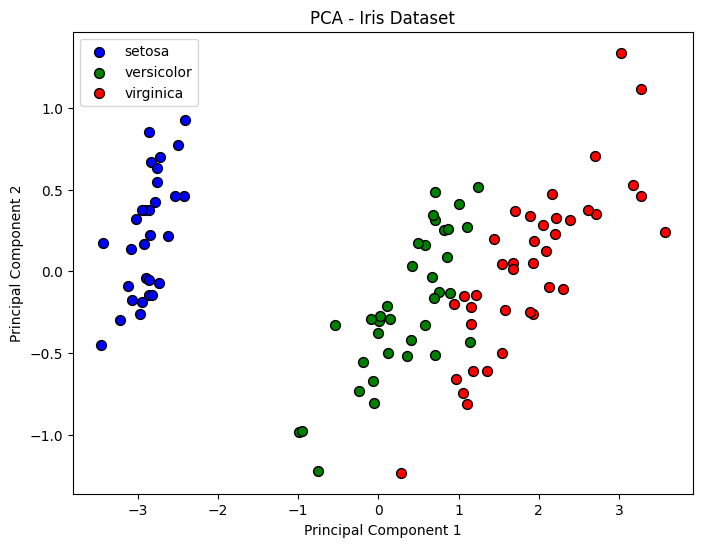

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize PCA
pca = PCA(n_components=2)

# Fit and transform data
X_pca = pca.fit_transform(X_iris_train)

class_labels = iris.target_names
colors = ['blue', 'green', 'red']

# Create the scatter plot
plt.figure(figsize=(8, 6))
for i, label in enumerate(class_labels):
    plt.scatter(X_pca[y_iris_train == i, 0], X_pca[y_iris_train == i, 1], label=label, c=colors[i], edgecolor='k', s=50)

plt.title("PCA - Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

In [ ]:
X_pca_train = pca.fit_transform(X_iris_train)
X_pca_test = pca.fit_transform(X_iris_test)

print("Accuracy on original Iris:", run_tree(X_iris_train, y_iris_train, X_iris_test, y_iris_test, task="clf"))
print("Accuracy on Iris after PCA:", run_tree(X_pca_train, y_iris_train, X_pca_test, y_iris_test, task="clf"))


Accuracy on original Iris: 0.9777777777777777
Accuracy on Iris after PCA: 0.8444444444444444
